In [65]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import math
%matplotlib inline
from numpy.linalg import norm

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *

from prettytable import PrettyTable


In [66]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    fig.set_dpi(100)

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z',
                  offset=y.min(), cmap=cm.coolwarm)

    # Plot 3d line
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

    fig.savefig('test2png.png', dpi=100)

In [67]:
def f(x, y):
    return -1 * ( (np.sin(x) * np.sin((1 * x**2) / np.pi)**20) + \
           (np.sin(y) * np.sin((2 * y**2) / np.pi)**20) )

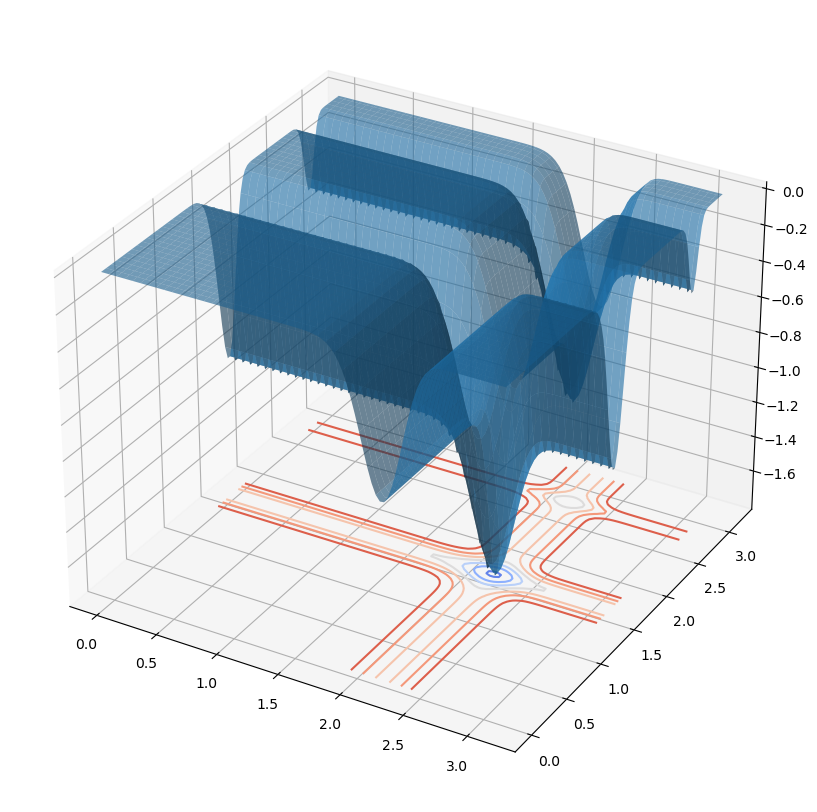

In [68]:
plot_3d(f, 0, np.pi, 0, np.pi)

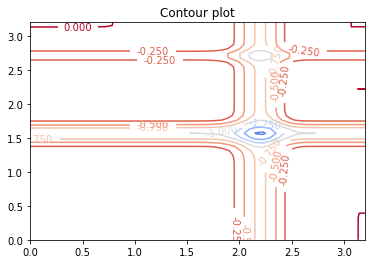

In [69]:
X = np.linspace(0, 3.2, 50)    
Y = np.linspace(0, 3.2, 50)    
X, Y = np.meshgrid(X, Y)
Z = -1 * ( (np.sin(X) * np.sin((1 * X**2) / np.pi)**20) + \
           (np.sin(Y) * np.sin((2 * Y**2) / np.pi)**20) )

plt.figure(2)
CS = contour(X, Y, Z, cmap=cm.coolwarm)
clabel(CS, inline=1, fontsize=10)
title('Contour plot')

show()

In [70]:
def dfdx(x, y):
    return -1 * (np.cos(x) * np.sin(x**2 / np.pi)**20 + 40 * np.sin(x**2 / np.pi)**19 * 
    np.cos(x**2 / np.pi) * x * np.sin(x) / np.pi) 

def dfdy(x, y):
    return -1 * (np.cos(y) * np.sin(2 * y**2 / np.pi)**20 + 
    80 * np.sin(2 * y**2 / np.pi)**19 * 
    np.cos(2 * y**2 / np.pi) * y * np.sin(y) / np.pi) 

def gradf(x, y):
    return np.array([dfdx(x, y), dfdy(x, y)])    

In [71]:
print(dfdx(2.20319, 1.57049))
print(dfdy(2.20319, 1.57049))

0.00924890297686276
-0.024805211125572425


In [72]:
x = 2.20319
y = 1.57049
h = 0.00001
print((f(x+h, y)-f(x, y))/h)
print((f(x, y+h)-f(x, y))/h)

0.009411491408428674
-0.024400446974048858


In [73]:
gradf(x, y)

array([ 0.0092489 , -0.02480521])

In [74]:
def step(init_ta, a0, theta, eps):
    a = a0
    grad_norm_2 = np.linalg.norm(gradf(init_ta[0], init_ta[1])) ** 2
    while True:
        init_ta_new = init_ta - a * gradf(init_ta)
        if f(init_ta_new) - f(init_ta) + eps * a * grad_norm_2 < 0:
            break
        a *= theta
    return a

In [75]:
v = 0.4
grad_norm=1e-8
x_norm=1e-6

In [76]:
def p(y):
    return np.clip(y, 0, np.pi)


def dist(x):
    return(np.linalg.norm(x - p(x)))

In [77]:
def p_grad_descent2(f, gradf, init_t, alpha):
    EPS = 1e-7
    prev_t = init_t-10*EPS
    t = init_t.copy()
    
    max_iter = 1000
    iter = 0
    table = PrettyTable()
    table.field_names = ['i', 't', 'f(t)', 'gradf(t)', 'proj(t)']
    while norm(t - prev_t) > EPS and iter < max_iter:
        prev_t = t.copy()
        t -= alpha*gradf(t[0], t[1])

        proj = np.copy(p(t))
        t = (1 - v) * prev_t + v * proj
        vector = np.vectorize(np.float64)
        t = vector(t)

        norm_new = np.linalg.norm(gradf(t[0], t[1]))

        # Условия останова
        if norm_new < grad_norm:
            break    
        if np.linalg.norm(proj - prev_t) < x_norm:
            break   

        #print(t, f(t[0], t[1]), gradf(t[0], t[1]), proj)
        table.add_row([iter, t, f(t[0], t[1]), gradf(t[0], t[1]), proj]) 
        iter += 1
        
    #print(table)
    
    return t, f(t[0], t[1])

In [78]:
x, y = 1.5, 1.5
p_grad_descent2(f, gradf, np.array([x, y]), 0.05)

(array([2.20290544, 1.57079633]), -1.8013034100984582)

In [79]:
x, y = 1.5, 1.5
point, f_min = p_grad_descent2(f, gradf, np.array([x, y]), 0.05)
print(' x_min = ', point[0],'\n y_min = ', point[1], '\n f_min = ', f_min)

 x_min =  2.202905444044766 
 y_min =  1.5707963267948966 
 f_min =  -1.8013034100984582
